In [3]:
%matplotlib inline

from glob import glob
from openpyxl import Workbook
from openpyxl import load_workbook

In [7]:
sheets = sorted(glob('data/govdata/*.xlsx'), key=lambda name: int(name.split('/data')[1].replace('.xlsx','')))
print(sheets)

['data/govdata/data1.xlsx', 'data/govdata/data2.xlsx', 'data/govdata/data3.xlsx', 'data/govdata/data4.xlsx', 'data/govdata/data5.xlsx', 'data/govdata/data6.xlsx', 'data/govdata/data7.xlsx', 'data/govdata/data8.xlsx', 'data/govdata/data9.xlsx', 'data/govdata/data10.xlsx', 'data/govdata/data11.xlsx', 'data/govdata/data12.xlsx', 'data/govdata/data13.xlsx']


In [8]:
sample = load_workbook(sheets[0])

In [13]:
sample.sheetnames

['Sheet1']

In [32]:
# nrows = 24 * 60 // 15
# for rr in range(nrows):
data = []
rr = 0
while True:
    date = sample['Sheet1'].cell(14 + rr, 1).value
    if date is None: break
    value = sample['Sheet1'].cell(14 + rr, 3).value
#     print(date, value)
    data.append([date, value])
    rr += 1
    

In [33]:
print(len(data), data[0][0], data[-1][0])

22741 01-03-2018 00:00 23-10-2018 21:00


In [34]:
import matplotlib.pyplot as plt

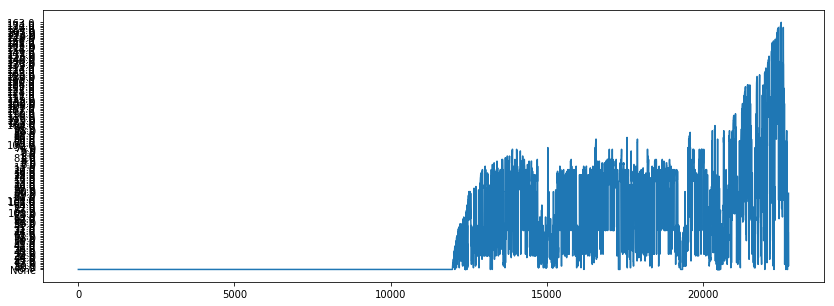

In [35]:
plt.figure(figsize=(14, 5))
plt.plot([ent[1] for ent in data])
plt.show()
plt.close()

In [53]:
data = []
locations = []
for fii, fname in enumerate(sheets):
    
    rr = 0
    sheet = load_workbook(fname)
    locations.append(sheet['Sheet1'].cell(5, 2).value)
    while True:
        date = sheet['Sheet1'].cell(14 + rr, 1).value
        if date is None: break
        value = sheet['Sheet1'].cell(14 + rr, 3).value
        if len(data) < rr + 1:
            data.append([None for _ in range(len(sheets))])
            
        data[rr][fii] = [date, None if value == 'None' else float(value)]
        rr += 1
#         if rr > 100: break
#     print(fname, sheet['Sheet1'].cell(5, 2).value, sheet.sheetnames, len(data), data[0][0])
    

In [59]:
print(data[0])
print(data[-1])

[['01-03-2018 00:00', None], ['01-03-2018 00:00', 90.0], ['01-03-2018 00:00', 121.0], ['01-03-2018 00:00', 125.67], ['01-03-2018 00:00', 116.0], ['01-03-2018 00:00', 138.0], ['01-03-2018 00:00', 94.32], ['01-03-2018 00:00', 110.67], ['01-03-2018 00:00', 110.67], ['01-03-2018 00:00', 89.29], ['01-03-2018 00:00', 94.32], ['01-03-2018 00:00', 107.0], ['01-03-2018 00:00', None]]
[None, None, None, None, None, None, None, None, None, None, ['23-10-2018 21:45', None], None, None]


In [60]:
valid = 0
for entries in data:
    anyNone = any([val is None for val in entries])
    if anyNone:
        break
    valid += 1
print(valid, len(data))

22741 22744


In [67]:
dump = []
for entries in data[:valid]:
#     print(entries)
    date = entries[0][0]
    bylocation = []
    for eii, ent in enumerate(entries):
        bylocation.append({
            'location': locations[eii],
            'pm25': ent[1],
        })
    obj = {
        'date': date,
        'values': bylocation
    }
    dump.append(obj)

print(dump[0])

{'date': '01-03-2018 00:00', 'values': [{'location': 'Sri Aurobindo Marg, Delhi - DPCC', 'pm25': None}, {'location': 'Punjabi Bagh, Delhi - DPCC', 'pm25': 90.0}, {'location': 'Sirifort, New Delhi - CPCB', 'pm25': 121.0}, {'location': 'Jawaharlal Nehru Stadium, Delhi - DPCC', 'pm25': 125.67}, {'location': 'Nehru Nagar, Delhi - DPCC', 'pm25': 116.0}, {'location': 'CRRI Mathura Road, New Delhi - IMD', 'pm25': 138.0}, {'location': 'Lodhi Road, New Delhi - IMD', 'pm25': 94.32}, {'location': 'Major Dhyan Chand National Stadium, Delhi - DPCC', 'pm25': 110.67}, {'location': 'Okhla Phase-2, Delhi - DPCC', 'pm25': 110.67}, {'location': 'IGI Airport (T3), New Delhi - IMD', 'pm25': 89.29}, {'location': 'Lodhi Road, New Delhi - IMD', 'pm25': 94.32}, {'location': 'Mandir Marg, New Delhi - DPCC', 'pm25': 107.0}, {'location': 'Dr. Karni Singh Shooting Range, Delhi - DPCC', 'pm25': None}]}


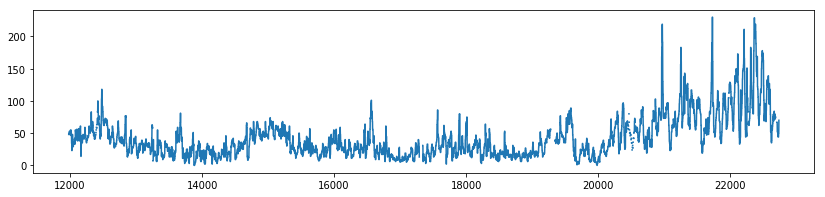

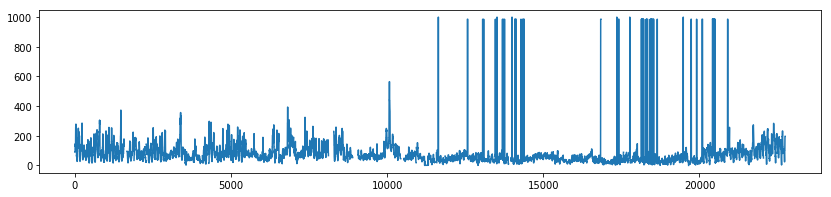

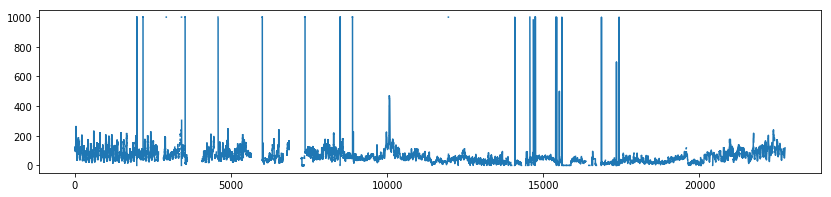

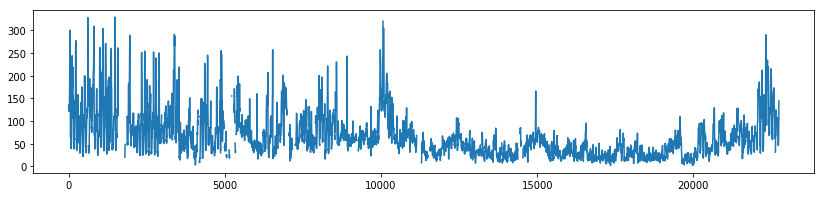

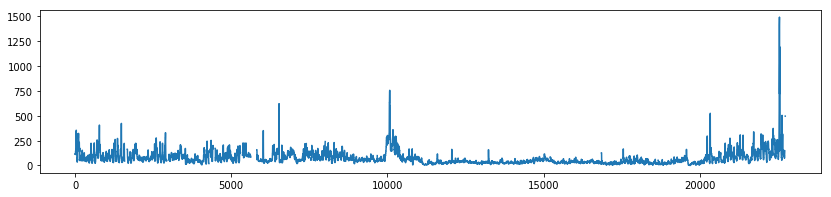

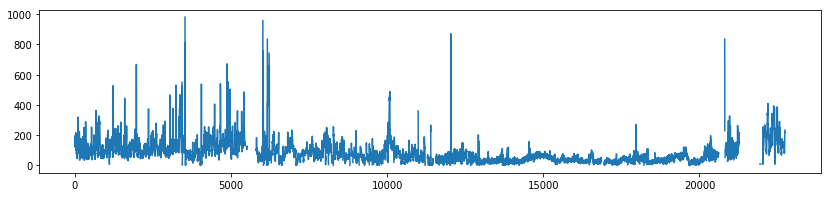

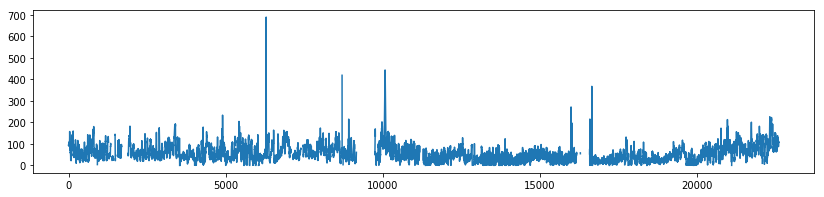

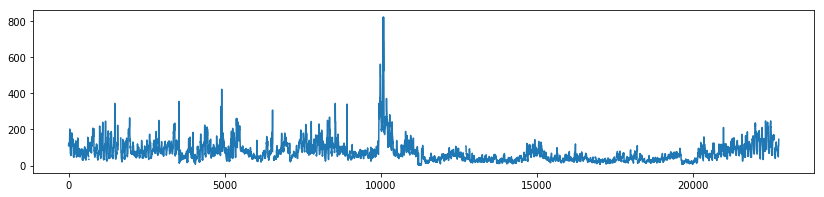

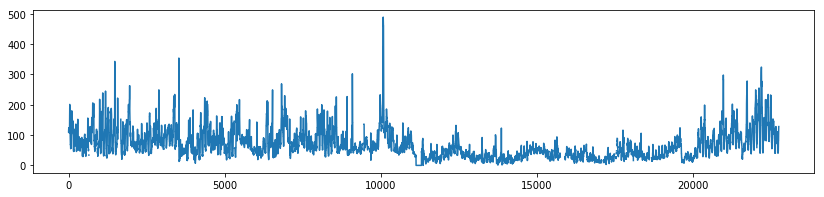

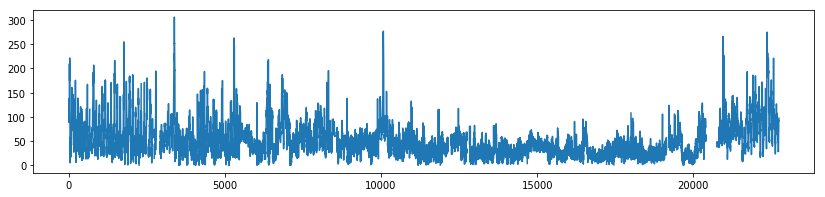

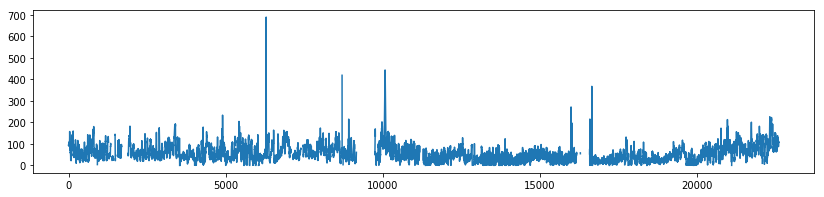

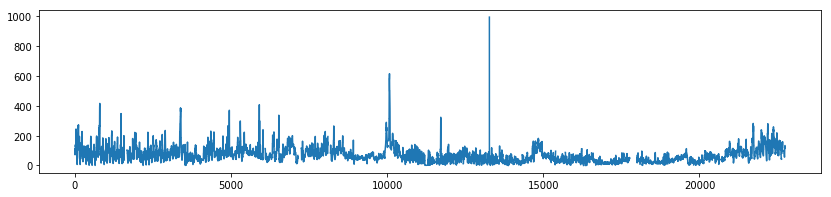

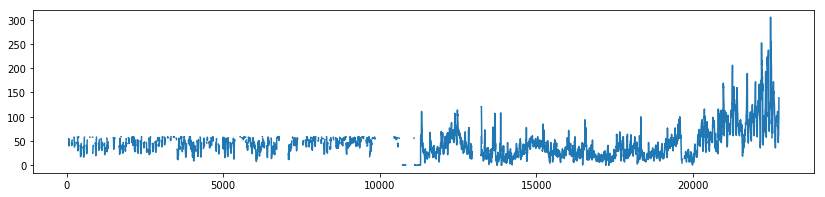

In [69]:
for ii in range(len(locations)):
    plt.figure(figsize=(14, 3))
    plt.plot([ent['values'][ii]['pm25'] for ent in dump])
    plt.show()
    plt.close()

In [71]:
import json
with open('data/gov.json', 'w') as fl:
    json.dump(dump, fl, indent=4)